In [1]:
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import statistics
import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re

def remove_urls(txt):
    """Removes urls from a given text."""
    pattern = r'https?://\S+'
    return re.sub(pattern, '', txt)

import warnings
warnings.filterwarnings("ignore")

# Counting Tweets

In [26]:
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)
dorian_counts = {}
rt_count = []

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    dorian_counts[str(start_date)] = len(df)
    rt_count.append(df['full_text'].str.startswith('RT @').sum())
    start_date += delta

print(rt_count)

[1639, 1525, 1707, 6382, 19736, 32014, 60896, 155159, 198623, 289334, 299843, 573391, 694758, 555803, 365042, 339382, 288661, 287730, 163781, 155386, 116990, 79966]


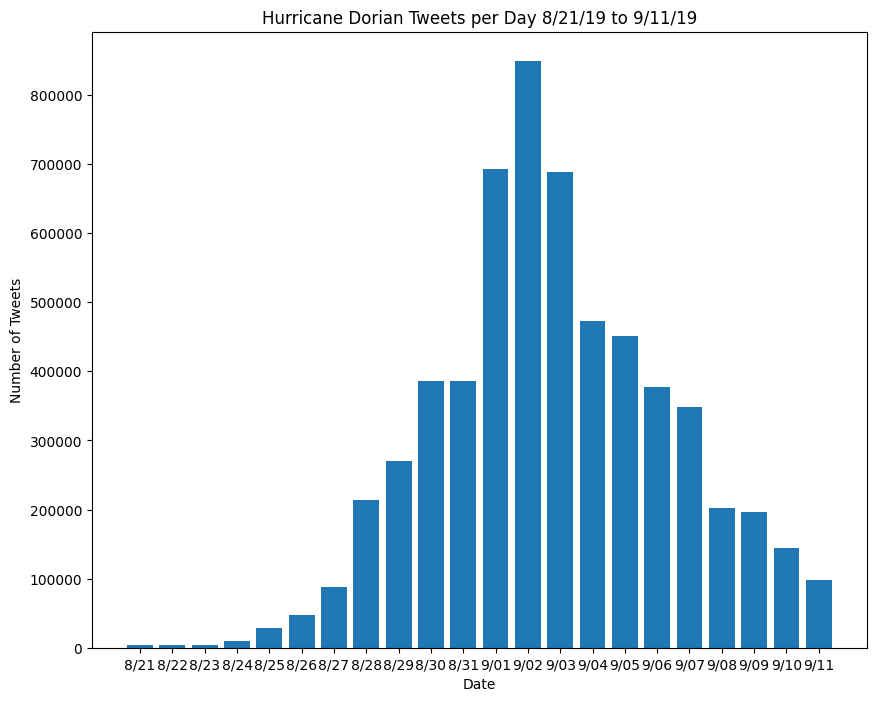

In [17]:
dorian_counts = {'2019-08-21': 3371, '2019-08-22': 3533, '2019-08-23': 3920, '2019-08-24': 10087, '2019-08-25': 27904, '2019-08-26': 47590, '2019-08-27': 87641, '2019-08-28': 213436, '2019-08-29': 269607, '2019-08-30': 385377, '2019-08-31': 385679, '2019-09-01': 692293, '2019-09-02': 849085, '2019-09-03': 688198, '2019-09-04': 472206, '2019-09-05': 450966, '2019-09-06': 376814, '2019-09-07': 348469, '2019-09-08': 202413, '2019-09-09': 195973, '2019-09-10': 144512, '2019-09-11': 97769}
# Total: 5956843
dates = pd.date_range(start='08/21/2019', end='09/11/2019')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(10,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Hurricane Dorian Tweets per Day 8/21/19 to 9/11/19')
plt.bar(range(len(dorian_counts)), list(dorian_counts.values()))
plt.show()

# Max Windspeed

In [18]:
dorian_track = pd.read_csv('dorian_track.csv')
dorian_track['Date'] = pd.to_datetime(dorian_track['Date'], format='%Y%m%d')
max_wind = []
start_date = datetime.date(2019, 8, 24)
end_date = datetime.date(2019, 9, 9)
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    sub = dorian_track[dorian_track['Date'].dt.date.astype('str') == str(start_date)]
    max_wind.append(max(sub['Max Wind']))
    start_date += delta
print(max_wind)

[35, 45, 45, 45, 70, 75, 100, 130, 160, 155, 115, 95, 100, 90, 85, 80, 50]


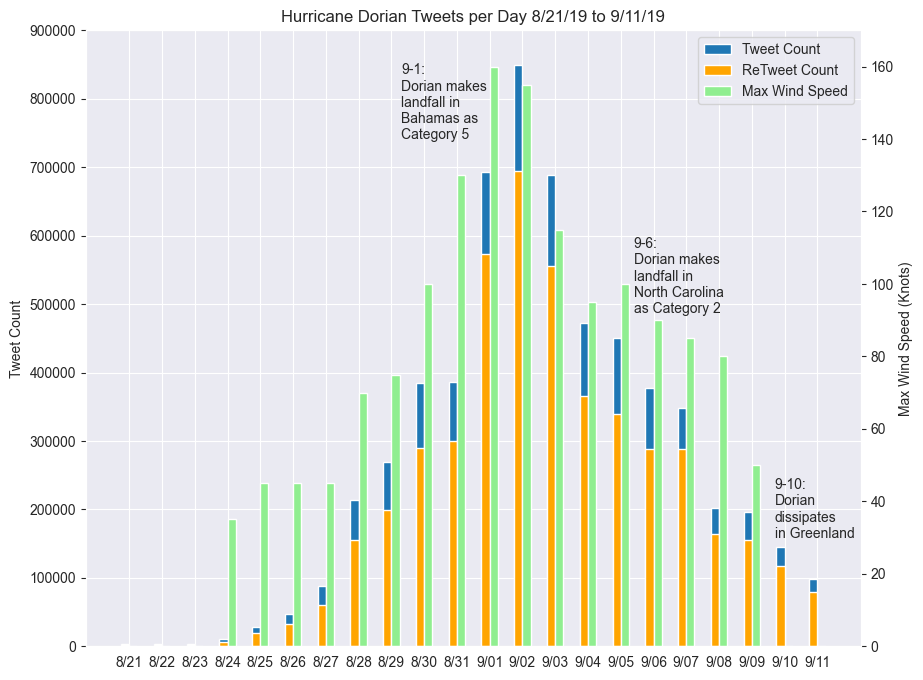

In [29]:
dorian_counts = {'2019-08-21': 3371, '2019-08-22': 3533, '2019-08-23': 3920, '2019-08-24': 10087, '2019-08-25': 27904, '2019-08-26': 47590, '2019-08-27': 87641, '2019-08-28': 213436, '2019-08-29': 269607, '2019-08-30': 385377, '2019-08-31': 385679, '2019-09-01': 692293, '2019-09-02': 849085, '2019-09-03': 688198, '2019-09-04': 472206, '2019-09-05': 450966, '2019-09-06': 376814, '2019-09-07': 348469, '2019-09-08': 202413, '2019-09-09': 195973, '2019-09-10': 144512, '2019-09-11': 97769}
max_wind = [0, 0, 0, 35, 45, 45, 45, 70, 75, 100, 130, 160, 155, 115, 95, 100, 90, 85, 80, 50, 0, 0]
rt_count = [1639, 1525, 1707, 6382, 19736, 32014, 60896, 155159, 198623, 289334, 299843, 573391, 694758, 555803, 365042, 339382, 288661, 287730, 163781, 155386, 116990, 79966]

# data = {'Tweet_Count':list(dorian_counts.values()), 'Max_Windspeed':max_wind}
# df = pd.DataFrame(data)
# df.plot(kind = 'bar', secondary_y = 'Max_Windspeed' , rot = 0, figsize = (10,8), title = 'Hurricane Dorian Tweets per Day 8/21/19 to 9/11/19')
# ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes
# ax1.set_ylabel('Tweet Count')
# ax1.set_ylim(0,9e5)
# ax1.set_xticks(range(len(dates)), formatted_dates)
# ax2.set_ylabel('Max Wind Speed (Knots)')
# ax2.set_ylim(0,170)
# plt.text(8.5, 140, '9-1:\nDorian makes\nlandfall in\nBahamas as\nCategory 5')
# plt.text(15.4, 90,'9-6:\nDorian makes\nlandfall in\nNorth Carolina\nas Category 2')
# plt.text(19.7, 30,'9-10:\nDorian\ndissipates\nin Greenland')

fig, ax1 = plt.subplots(figsize=(10,8))
ax1.bar(range(len(list(dorian_counts.values()))), list(dorian_counts.values()), width=-0.25, align='edge')
ax1.bar(range(len(rt_count)), rt_count, width=-0.25, align='edge', color='orange')
ax1.set_title('Hurricane Dorian Tweets per Day 8/21/19 to 9/11/19')
ax1.set_ylabel('Tweet Count')
ax1.set_ylim(0,9e5)
ax1.set_xticks(range(len(dates)), formatted_dates)
ax2 = ax1.twinx()
ax2.bar(range(len(max_wind)), max_wind, width=0.25, align='edge', color='lightgreen')
ax2.set_ylabel('Max Wind Speed (Knots)')
ax2.set_ylim(0,170)
plt.text(8.3, 140, '9-1:\nDorian makes\nlandfall in\nBahamas as\nCategory 5')
plt.text(15.4, 92,'9-6:\nDorian makes\nlandfall in\nNorth Carolina\nas Category 2')
plt.text(19.7, 30,'9-10:\nDorian\ndissipates\nin Greenland')
plt.grid(b=None)
fig.legend(['Tweet Count','ReTweet Count', 'Max Wind Speed'], bbox_to_anchor=(0.9, 0.88))

plt.savefig('tweets counts/tweets_per_day_dorian4.png')
plt.show()

# Sentiment by Day/Hour

In [ ]:
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)
avg_sentiment = []
dorian_counts = []
avg_sentiment_hourly = []
dorian_counts_hourly = []
analyzer = SentimentIntensityAnalyzer()

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    df = df[~df['full_text'].str.startswith("RT @", na=False)]
    df['full_text'] = [remove_urls(tweet) for tweet in df['full_text']]
    df = df.drop_duplicates(subset=['full_text'])
    dorian_counts.append(len(df))
    print(start_date)

    compound_scores = []
    for sentence in df['full_text']:
        vs = analyzer.polarity_scores(sentence)
        #print("{:-<65} {}".format(sentence, str(vs)))
        compound_scores.append(vs['compound'])
    avg_sentiment.append(statistics.mean(compound_scores))

    # for hour in range(24):
    #     compound_scores = []
    #     df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
    #     dorian_counts_hourly.append(len(df_sub))
    #     if len(df_sub['full_text']) > 0:
    #         for sentence in df_sub['full_text']:
    #             if type(sentence) != int:
    #                 vs = analyzer.polarity_scores(sentence)
    #                 #print("{:-<65} {}".format(sentence, str(vs)))
    #                 compound_scores.append(list(vs.values())[3])
    #         avg_sentiment_hourly.append(statistics.mean(compound_scores))
    #     else:
    #         avg_sentiment_hourly.append(0)

    start_date += delta

In [4]:
pd.Series(avg_sentiment).describe()

count    22.000000
mean      0.035342
std       0.041595
min      -0.062537
25%       0.013720
50%       0.036046
75%       0.066834
max       0.104998
dtype: float64

## Plot Sentiment by Day

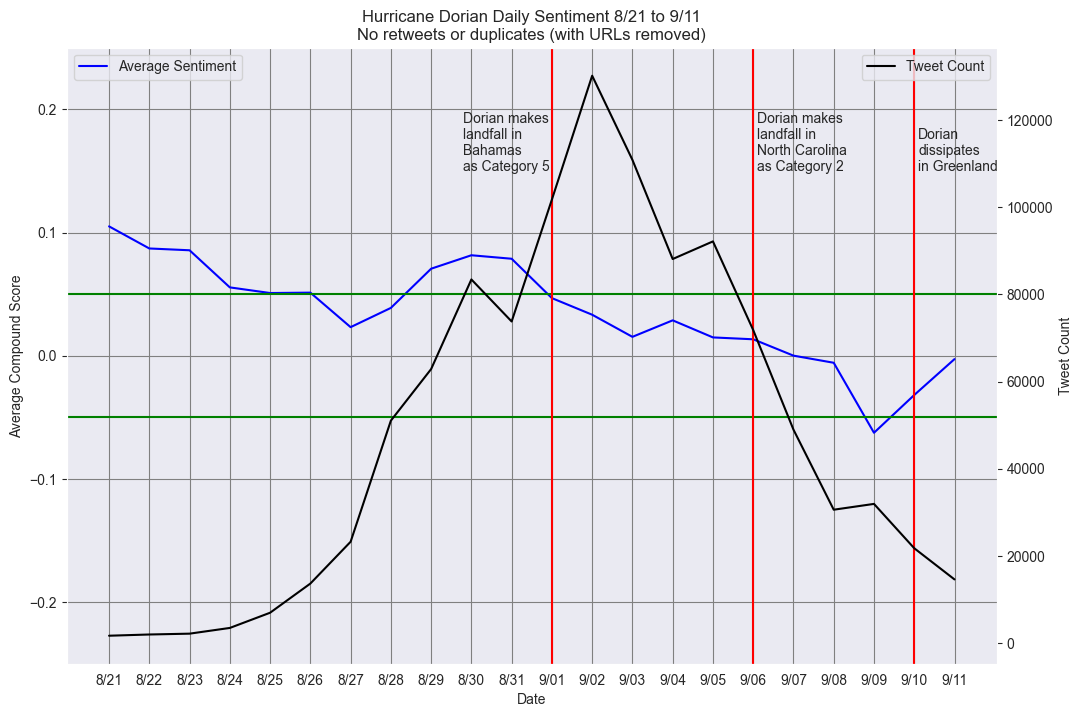

In [25]:
# no retweets or duplicates
# avg_sentiment = [0.10181556329849013, 0.0860778, 0.0841687216681777, 0.05087693557119654, 0.03909021658872754, 0.0492003549303046, 0.018536867832299304, 0.032792606970324364, 0.057812692726989565, 0.07069571221006199, 0.06753647621497731, 0.033804447224076876, 0.017490299235965588, 0.0011252177740006686, 0.012916103219519508, 0.004478495767486726, -0.0042727023945267955, -0.020619829695767197, -0.0268734118319817, -0.07692326380307449, -0.05057457058458845, -0.009620659105016645]
# no retweets or duplicates (with URLs removed)
avg_sentiment = [0.1049982880755608, 0.08705425101214576, 0.08558966312874942, 0.05547155172413793, 0.05088551951779564, 0.05120387290431218, 0.023189264977850416, 0.03880905510268067, 0.07062117235345582, 0.08154811929134802, 0.07871152058117943, 0.046753462456885116, 0.0332827143515673, 0.015323625882926038, 0.028718427175430432, 0.014857823860060335, 0.013340098865139595, 6.38290486594658e-05, -0.0057204986602182855, -0.06253668816934928, -0.03188446762556868, -0.0027494318181818167]
dorian_counts = [1694, 1976, 2167, 3480, 6968, 13659, 23251, 51032, 62865, 83426, 73781, 101763, 130160, 110853, 88109, 92154, 71815, 48973, 30602, 31934, 21761, 14608]

# Date range
dates = pd.date_range(start='08/21/2019', end='09/11/2019')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
# Specifications
plt.figure(figsize=(12,8))
plt.title('Hurricane Dorian Daily Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nNo retweets or duplicates (with URLs removed)')
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.ylim([-.25, .25])

# Sentiment Scores
plt.plot(avg_sentiment, label='Average Sentiment', color='blue') # plt.bar(range(len(avg_sentiment)), avg_sentiment)
plt.legend(loc='upper left')
plt.grid(color='gray', axis='both')
# Thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# Storm timeline
plt.axvline(x=11, color='red')
plt.text(8.8, .15, 'Dorian makes\nlandfall in\nBahamas\nas Category 5')
plt.axvline(x=16, color='red')
plt.text(16.1, .15,'Dorian makes\nlandfall in\nNorth Carolina\nas Category 2')
plt.axvline(x=20, color='red')
plt.text(20.1, .15,'Dorian\ndissipates\nin Greenland')
# Tweet Counts
plt.twinx()
plt.plot(dorian_counts, label='Tweet Count', color='black')
plt.ylabel('Tweet Count')
plt.legend()
plt.grid(b=None)

plt.savefig('sentiment analysis/Dorian/sentiment_daily_dorian2.png')
plt.show()

## Plot Sentiment by Hour

In [10]:
pd.Series(avg_sentiment_hourly).describe()

count    528.000000
mean       0.034607
std        0.053010
min       -0.171292
25%        0.004735
50%        0.033747
75%        0.064327
max        0.208676
dtype: float64

In [6]:
# no retweets or duplicates (with URLs removed)
avg_sentiment_hourly = [0.20178695652173914, 0.0403, 0.11343793103448276, 0.11747627118644068, -0.04901578947368421, 0.13435454545454545, 0.2085027027027027, -0.052065625000000004, 0.028311111111111113, 0.037762, 0.05998787878787879, 0.04865671641791045, 0.13154285714285713, 0.07303888888888889, 0.14680632911392405, 0.11899047619047619, 0.032212698412698415, 0.08788133333333334, 0.17199204545454547, 0.14447857142857143, 0.1336873563218391, 0.12624754098360655, 0.03850165289256199, 0.20669142857142858, 0.10120851063829787, 0.12949117647058822, 0.15394901960784313, 0.07169736842105263, 0.16271224489795919, 0.20867608695652173, 0.07029428571428571, 0.03202894736842105, 0.20245686274509803, 0.06056304347826087, 0.0021372881355932218, -0.02295204081632653, 0.08851927710843374, 0.08703157894736842, 0.04804117647058824, 0.07776703296703297, 0.036744827586206896, 0.13558365384615384, 0.07028372093023257, 0.07581463414634146, 0.11472234042553192, 0.1026298969072165, 0.1548704761904762, 0.046624475524475524, 0.06843483146067415, 0.05728717948717949, 0.13134477611940298, 0.1677831168831169, 0.1696769230769231, 0.15862156862745097, -0.028170175438596495, 0.07973333333333334, 0.04964918032786885, 0.0778125, 0.13002137404580152, 0.054685882352941174, 0.14513118279569892, 0.07867191011235955, 0.04245408163265306, 0.10358131868131869, 0.05058979591836735, 0.0460256, 0.05246057692307692, 0.09816016260162602, 0.12316538461538461, 0.09435979381443299, 0.10375045871559634, 0.0664125, 0.13802978723404255, 0.1648816091954023, 0.0783375, 0.05621269841269841, 0.05084565217391305, 0.06247846153846154, 0.09891290322580645, 0.06771379310344827, 0.03391228070175439, 0.0886551724137931, 0.09755161290322581, 0.189234693877551, 0.13045967741935485, 0.04599852941176471, 0.06964931506849316, 0.051545161290322584, 0.10236971830985915, 0.03477254901960785, 0.004688235294117648, -0.01897820512820513, 0.05126818181818182, 0.04489479606188467, 0.02988120649651972, 0.03282055137844612, 0.08481132686084143, 0.05340325581395349, 0.04329518518518519, 0.026620512820512823, 0.03244671052631579, 0.01568787878787879, 0.07499382716049383, 0.11239473684210527, 0.025927551020408165, 0.04513058823529412, 0.08330909090909092, 0.013196261682242992, 0.04192543554006969, 0.03179573863636364, 0.04305933503836317, 0.025076059322033897, 0.04906439169139466, 0.06099974226804124, 0.04990921052631579, 0.070728173374613, 0.08980490196078432, 0.06472376237623763, 0.05916967032967033, 0.038364375, 0.06198929503916449, 0.04866731391585761, 0.05301513353115727, 0.03219333333333334, 0.044193193717277486, 0.03598536585365854, 0.08473953488372094, 0.07402835820895523, 0.10503960396039604, 0.07888931034482759, 0.07301376344086022, 0.06328363970588236, 0.06927071197411003, 0.06633128038897892, 0.0697354748603352, 0.05698646408839779, 0.05574304347826087, 0.049329554140127393, 0.06749391727493917, 0.014283676268861454, 0.04346466083150985, 0.0395229704797048, 0.024501714801444044, 0.03276959385290889, 0.04170256410256411, 0.04089984375, 0.02168531746031746, 0.018337220447284346, 0.04648555133079848, 0.033581904761904764, 0.06356226415094339, 0.04766368715083799, 0.05839662447257384, 0.024996564885496186, 0.051809584664536744, 0.030848425196850396, 0.027502506714413608, 0.05079956970740103, 0.010534989200863933, 0.017973527420446854, 0.03656694277108434, 0.028444924242424244, 0.0330585873605948, 0.013718510158013545, -0.008441789287816363, 0.02306721398305085, -8.46354166666653e-05, 0.005809402283411687, 0.011324320352681853, 0.03115376766091052, 0.013351553316540725, 0.023202875816993464, 0.05249449275362319, 0.008793175853018375, 0.029142088607594936, 0.028263636363636362, 0.04635447570332481, 0.07106263858093126, 0.053496894409937885, 0.059759438924605494, 0.04490432829726419, 0.03545438288920056, 0.020777170283806344, 0.04767107714353953, 0.054651717847370024, 0.04683710992409334, 0.04918271233510761, 0.03588434616608336, 0.030923890982893592, 0.0269227834780321, 0.03451106370009144, 0.03693162452372705, 0.05930835734870317, 0.05295396081771721, 0.07392872531418312, 0.0735353409090909, 0.04906995515695067, 0.029803085299455537, -0.007983189655172413, 0.040350622406639, 0.0861572695035461, 0.06715136226034309, 0.07499333333333333, 0.121440201665936, 0.07642852552659765, 0.08227388172858226, 0.08479643652561247, 0.06918707254398103, 0.08357953091684435, 0.07558595790034639, 0.0794853277835588, 0.07497040409789414, 0.05975745903383699, 0.0543623495226235, 0.055208925410872314, 0.07539693818601964, 0.05541637339695795, 0.0680469696969697, 0.05244905829596413, 0.0643206786171575, 0.06482329828444937, 0.0503746192893401, 0.046316132264529054, 0.0354578302712161, 0.064344, 0.0476297383535418, 0.09300384263494968, 0.0832414914586071, 0.08616706507304117, 0.11105284495021338, 0.0850098548841239, 0.07730920334667152, 0.08377645891226677, 0.10021171247357294, 0.0944146192893401, 0.09215322283609577, 0.10249224790345673, 0.07821809753384017, 0.07733046146851558, 0.0929311743772242, 0.0908654019688269, 0.09818038572014773, 0.09415951438374241, 0.08258797364085667, 0.07908967418546366, 0.05803924142961342, 0.032824245115452934, 0.036035114503816794, 0.03922273180458624, 0.05794746932515338, 0.07987495350278984, 0.1126811743119266, 0.09709851174934726, 0.09403314258464474, 0.08257449966269395, 0.07402175882241932, 0.07946824014665445, 0.07298231899265477, 0.06027648382559775, 0.06374361153262519, 0.07182723156532989, 0.06800035714285714, 0.06587406736689605, 0.07218862231915667, 0.06490694386694387, 0.06504495331258336, 0.0578909534368071, 0.04618311004784689, 0.033478828510938606, 0.014715873015873017, 0.028659823677581863, 0.022206155507559396, 0.014702021563342318, 0.02654143870314083, 0.06664322469982847, 0.042320096852300246, 0.036564003994008984, 0.06747362068965518, 0.057874250832408436, 0.06574324684772066, 0.05676451657843411, 0.056509525015832805, 0.04093138342112559, 0.037316233951497864, 0.034127004594634656, 0.027030143338954468, 0.03346540980987378, 0.041969663799843626, 0.048915322874863186, 0.046215562787136295, 0.05842196196196196, 0.03145146551724138, 0.031130632183908047, 0.03353975438596491, -0.00018328861632809456, 0.003456182293612253, -0.017078929924242425, 0.004749979347377118, 0.01915692307692308, 0.029734775749380212, 0.045689019305019306, 0.055101474377326085, 0.04537920292596797, 0.031202288628009014, 0.04596598657024793, 0.039492854055611586, 0.0507656365182875, 0.048303392150897476, 0.048920408795292664, -0.0003919932955131498, -0.0041732598607888615, 0.016244316214656666, 0.023596708155912218, 0.02905272856130404, 0.026521960640058857, -0.0032388247422680404, 0.010520579174368454, -0.014346037596756357, -0.03307442857142857, -0.03253866943866944, -0.023491384950926935, -0.02574738731551655, -0.012035769102435768, 0.006508633262761704, 0.01443247971145176, 0.02041948029298919, 0.01958169228170917, 0.020046237369929124, 0.02701175567309333, 0.021396672306824592, 0.03117123034227567, 0.02096357667052916, 0.01986297408937289, 0.01908784481224417, 0.025551714339837092, 0.03793138523761375, 0.05998996756255792, 0.009319555555555557, 0.022865377906976743, 0.017933253995239717, 0.006799217603911981, -0.002435868893011749, -0.01995828651685393, -0.04240842598010532, -0.025799021084337348, -0.004088813382122321, 0.010438196176226102, 0.047299513085818624, 0.045904330065359475, 0.05127310376919497, 0.05305993179880648, 0.04974670295164329, 0.06359095828635851, 0.0671901722614841, 0.05980533683289589, 0.04301809210526316, 0.005279452054794522, 0.015324693804034582, 0.003021424512218224, -0.0013793875765529312, 0.007714613602863761, 0.005335956678700361, 0.0168311018957346, 0.03229512319024638, -0.008408871287128713, -0.025271017471736896, -0.03557574950033311, -0.014503740374037403, -0.004033822629969418, 0.0024235378715244497, 0.027765552995391705, 0.02729263157894737, 0.017493237131165195, 0.0135299022426682, 0.029811374764595104, 0.01734263959390863, 0.0190087996985114, 0.03057779612051176, 0.030804312203536008, 0.027194087282965743, 0.0028134817303653932, -0.008079127659574468, 0.008732131800088458, 0.039573123909249566, 0.01602905785970302, 0.011338340034462952, 0.00040377720870678576, 0.00869355581127733, -0.0349623745819398, -0.0243447599729547, -0.0025045454545454546, -0.05255311606632361, -0.016176674546887312, -0.0005320307495195393, 0.03188799240626483, 0.023588356407525737, 0.04438129120879121, 0.03433502081963621, 0.015070460213103605, 0.01190687748783724, 0.020353091364205256, 0.04437625372729737, 0.028394618834080718, 0.02980326506381716, 0.017813607393244106, 0.007228081360048574, -0.0017970879801734807, -0.01167814371257485, 0.008410687311178248, 0.014464476473081815, -0.01898667275216796, -0.013959721448467967, -0.035215663524292964, -0.06512621621621621, -0.05231021233569262, -0.05344397163120568, -0.04354057142857143, -0.04878222003929273, -0.02216954986760812, -0.004561631944444444, 0.01144095547309833, 0.018127924217462933, 0.006856838235294118, -0.003126118855465884, 0.016710015290519877, 0.024413463666543712, 0.037969035890218154, 0.03942131277184658, 0.013035614849187936, -0.020391875240662303, 0.004584797297297297, -0.006075136363636362, 0.0028977413890457376, 0.013261849357011635, -0.015611035422343324, -0.013949999999999997, -0.02953139896373057, -0.0485413881748072, -0.03929282218597063, -0.03203333333333333, -0.0308928035982009, -0.01076624649859944, -0.019108009422850413, -0.003075896057347669, -0.002618955650929899, 0.013053633633633634, -0.0002494661921708178, -0.010497460129946838, 0.0068286678944137515, 0.022685106382978725, 0.010154618473895583, -0.017508877615726063, -0.01805628612716763, 0.004289947486871718, -0.005461287820015515, -0.0017795902285263974, 0.002797886029411765, -0.04007316356513222, -0.037173893805309735, -0.07202682648401827, -0.028123645970937913, -0.04795840108401084, -0.03937067209775967, -0.025984615384615384, -0.020679787234042554, -0.0416238782051282, -0.03231192660550459, -0.03474389140271493, -0.013802663622526636, -0.029471216041397155, -0.012388782412626831, -0.011804358812381554, -0.02196090909090909, 0.004017950310559007, 0.00018110344827586332, -0.11992662746745066, -0.13757041267501843, -0.17129155112651645, -0.14178399798081776, -0.10268204715969989, -0.0902375171467764, -0.09818080495356037, -0.07316878727634195, -0.07611662679425837, -0.09645036075036074, -0.0784992, -0.0459225974025974, -0.1148994071146245, -0.13464061757719714, -0.044849795081967216, -0.11979101497504159, -0.04711906474820144, -0.06425896520963426, -0.002427596899224806, 0.004256443104747552, -0.035500666666666666, 0.026624825783972125, 0.004036851851851851, 0.002113605442176871, 0.026691728525980913, 0.0495087, 0.03748704720087816, 0.017664530386740335, 0.03023214739517154, 0.022557798165137616, 0.04147376788553259, 0.025331066176470587, -0.01684543325526932, 0.04156472303206997, -0.04778298611111111, 0.020179553903345724, 0.031868474576271184, 0.026319622641509437, 0.0282205047318612, 0.0008469656992084449, 0.04108898305084746, 0.0004733221476510087, 0.055354794520547944, 0.07085982404692083, 0.01808223140495868, 0.016093717277486912, -0.02131125748502994, -0.007362885326757089, -0.0417660469667319, -0.07725252435783879, -0.047074440894568685, -0.043612, -0.01959230769230769]
dorian_counts_hourly = [69, 81, 87, 59, 38, 33, 37, 32, 36, 50, 66, 67, 63, 54, 79, 84, 63, 75, 88, 98, 87, 122, 121, 105, 141, 68, 51, 76, 49, 46, 35, 38, 51, 92, 59, 98, 83, 57, 102, 91, 87, 104, 86, 123, 94, 97, 105, 143, 89, 78, 67, 77, 52, 51, 57, 42, 61, 72, 131, 85, 93, 89, 98, 91, 98, 125, 208, 123, 78, 97, 109, 96, 94, 87, 72, 63, 46, 65, 62, 29, 57, 58, 62, 49, 62, 68, 73, 155, 142, 102, 119, 78, 396, 711, 431, 399, 309, 215, 270, 312, 152, 99, 81, 95, 98, 170, 176, 214, 287, 352, 391, 472, 337, 388, 380, 323, 306, 606, 455, 480, 383, 309, 337, 285, 191, 123, 86, 134, 202, 290, 465, 544, 618, 617, 716, 1086, 920, 785, 822, 729, 914, 1084, 1108, 911, 936, 640, 756, 626, 263, 210, 159, 179, 237, 524, 626, 1016, 1117, 1162, 1389, 1477, 1328, 1320, 1345, 1329, 1699, 1888, 1536, 1489, 1361, 1274, 1191, 1530, 690, 381, 316, 385, 391, 902, 1288, 1711, 2449, 2852, 2396, 4187, 3289, 3557, 4321, 3143, 3449, 3801, 3281, 2887, 2776, 2348, 2228, 1760, 892, 551, 464, 723, 564, 991, 1380, 2281, 2801, 2638, 3143, 5059, 4221, 3753, 3844, 3514, 4699, 4818, 3955, 3462, 3353, 3168, 3345, 3124, 1807, 1182, 998, 1143, 950, 1567, 2186, 3044, 3765, 4218, 4617, 5498, 5038, 4730, 5910, 4887, 4889, 5393, 4399, 4215, 4876, 4874, 3789, 3035, 1995, 1371, 1126, 1310, 1003, 1304, 1613, 2725, 3830, 4194, 4447, 5299, 4364, 3812, 3555, 3295, 3092, 3360, 2761, 2751, 2405, 2249, 2255, 2090, 1417, 1008, 794, 926, 742, 987, 1166, 2065, 6009, 6380, 7208, 8248, 7178, 7895, 7214, 7010, 6747, 7116, 6259, 6395, 5482, 5224, 4995, 4640, 3480, 2850, 2609, 2677, 2112, 2421, 3055, 4437, 6475, 6986, 7929, 8433, 7744, 6941, 7054, 6574, 6458, 7756, 6896, 6932, 6106, 5644, 5437, 4850, 3246, 2713, 2100, 2405, 1834, 2507, 2997, 4251, 5545, 5734, 5921, 6631, 5861, 5319, 5405, 5178, 5326, 5619, 5279, 4945, 4316, 4275, 3440, 2941, 2045, 1617, 1424, 1709, 1328, 1913, 2406, 3286, 3672, 4298, 4692, 4777, 4435, 4528, 4572, 4560, 5329, 5552, 5279, 5715, 4749, 4155, 3376, 3937, 2525, 1946, 1501, 1818, 1635, 2086, 2604, 3515, 4643, 5217, 5310, 5516, 5307, 4846, 4638, 4262, 4762, 4700, 4522, 4584, 3906, 3482, 3124, 2607, 1794, 1479, 1386, 1749, 1269, 1561, 2107, 2817, 3640, 4563, 4411, 4522, 3995, 3689, 3345, 3369, 3138, 3294, 3228, 3340, 2648, 2359, 2191, 1795, 1379, 1110, 989, 1269, 875, 1018, 1133, 1728, 2156, 2428, 2720, 2726, 2616, 2711, 2842, 2529, 2586, 2597, 2368, 2200, 1771, 1633, 1468, 1258, 965, 778, 613, 849, 667, 714, 849, 1116, 1398, 1665, 1686, 1693, 1629, 1504, 1494, 1577, 1384, 1333, 1289, 1269, 1088, 1021, 1130, 876, 757, 738, 491, 585, 470, 624, 872, 1105, 1314, 1546, 1774, 1583, 1650, 1610, 1450, 2381, 2714, 2308, 1981, 1866, 1458, 1292, 1006, 836, 693, 500, 385, 506, 421, 488, 601, 834, 1121, 1290, 1327, 1200, 1148, 1080, 1029, 943, 1000, 911, 905, 787, 654, 629, 544, 427, 343, 288, 269, 295, 265, 317, 379, 472, 596, 657, 682, 726, 764, 835, 811, 1022, 1129, 939, 850, 715]


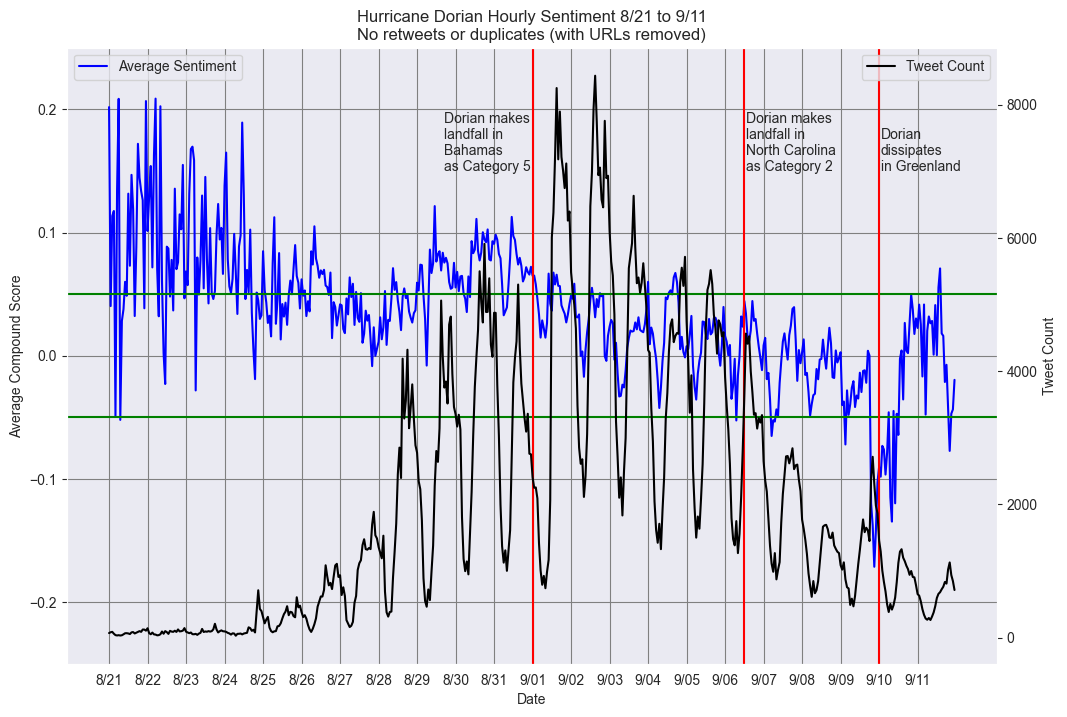

In [11]:
# Date Range
dates = pd.date_range(start='08/21/2019', end='09/11/2019')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
# Specifications
plt.figure(figsize=(12,8))
plt.title('Hurricane Dorian Hourly Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nNo retweets or duplicates (with URLs removed)')
plt.xticks(np.arange(0, len(avg_sentiment_hourly), 24), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
plt.ylim([-.25, .25])

# Sentiment Scores
plt.plot(avg_sentiment_hourly, label='Average Sentiment', color='blue')
plt.grid(color='gray', axis='both')
plt.legend(loc='upper left')
# Thresholds
plt.axhline(y=.05, color='green')
plt.axhline(y=-.05, color='green')
# Storm Timeline
plt.axvline(x=24*11, color='red')
plt.text(24*11-55, .15, 'Dorian makes\nlandfall in\nBahamas\nas Category 5')
plt.axvline(x=24*16.5, color='red')
plt.text(24*16.5+1, .15, 'Dorian makes\nlandfall in\nNorth Carolina\nas Category 2')
plt.axvline(x=24*20, color='red')
plt.text(24*20+1, .15, 'Dorian\ndissipates\nin Greenland')
# Tweet Counts
plt.twinx()
plt.plot(dorian_counts_hourly, label='Tweet Count', color='black')
plt.ylabel('Tweet Count')
plt.legend()
plt.grid(b=None)

plt.savefig('sentiment analysis/Dorian/sentiment_hourly_dorian2.png')
plt.show()

# Wordclouds by Phase

In [2]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

text = ''
count = 0

while start_date <= end_date:
    if start_date == datetime.date(2019, 9, 6):
        # wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        # wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_pre_hurricane2.png")
        # print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])
        print(count)
        count = 0
        text = ''
    elif start_date == datetime.date(2019, 9, 10):
        # wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        # wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_during_hurricane2.png")
        # print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])
        print(count)
        count = 0
        text = ''
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    df = df[df['full_text'].str.lower().str.contains('hospital')]
    # text += " ".join(remove_urls(tweet) for tweet in df['full_text'])
    count += len(df)
    start_date += delta

# wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
# wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_post_hurricane2.png")
# print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])
print(count)

6252
1908
781


# Wordcloud by Frequencies

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])

start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

text = ''

while start_date <= end_date:
    if start_date == datetime.date(2019, 9, 6):
        cv=CountVectorizer(stop_words=stopwords, ngram_range=(1, 3))
        # fit transform our text and create a dataframe with the result
        X = cv.fit_transform(text)
        X = X.toarray()
        bow=pd.DataFrame(X, columns = cv.get_feature_names())

        wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_pre_hurricane2.png")
        print('Pre-hurricane:\n', list(wordcloud.words_.items())[0:10])
        text = ''
    elif start_date == datetime.date(2019, 9, 10):
        wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
        wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_during_hurricane2.png")
        print('During-hurricane:\n', list(wordcloud.words_.items())[0:10])
        text = ''
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    df = df[df['full_text'].str.lower().str.contains('hospital')]
    text += " ".join(remove_urls(tweet) for tweet in df['full_text'])
    start_date += delta

wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file("wordclouds/Dorian/hospitals/dorian_post_hurricane2.png")
print('Post-hurricane:\n', list(wordcloud.words_.items())[0:10])

# Keyword Frequencies

In [ ]:
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

keywords = {'hospital':[], 'evacuate':[], 'closed':[], 'full':[], 'flood':[], 'victim':[]}
hospital_status = pd.DataFrame()

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    print(start_date)
    df = df[~df['full_text'].str.startswith("RT @", na=False)]
    df['full_text'] = [remove_urls(text).lower() for text in df['full_text']]
    df = df.drop_duplicates(subset=['full_text']).reset_index(drop=True)

    # for i in range(len(df['full_text'])):
    #     tweet = df['full_text'][i].lower()
    #     for word in keywords:
    #         if word in tweet:
    #             keywords[word] += 1

    for hour in range(24):
        df_sub = df[df['time'].str[11:13] == str(hour).zfill(2)]
        if len(df_sub['full_text']) > 0:
            for word in keywords:
                count = 0
                for sentence in df_sub['full_text']:
                    if word in sentence:
                        count += 1
                keywords[word].append(count)
        else:
            for word in keywords:
                keywords[word].append(0)

    start_date += delta

# print(keywords)

In [12]:
keywords = {'hospital': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 4, 5, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 6, 3, 5, 13, 1, 2, 6, 4, 3, 1, 2, 1, 0, 4, 0, 1, 0, 0, 0, 2, 3, 3, 4, 10, 11, 14, 4, 6, 2, 1, 1, 2, 0, 4, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 3, 3, 3, 10, 7, 3, 4, 4, 1, 3, 4, 0, 3, 0, 4, 0, 0, 2, 0, 0, 5, 7, 3, 9, 6, 4, 3, 3, 5, 4, 6, 2, 0, 1, 3, 3, 1, 1, 1, 2, 0, 0, 2, 0, 4, 3, 5, 0, 1, 2, 1, 1, 0, 0, 1, 3, 2, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 3, 3, 3, 2, 3, 2, 2, 8, 3, 5, 1, 5, 6, 5, 4, 2, 1, 3, 0, 1, 0, 0, 1, 8, 4, 12, 3, 9, 14, 5, 10, 14, 5, 10, 12, 7, 8, 10, 7, 10, 1, 0, 3, 0, 1, 5, 5, 8, 6, 18, 11, 13, 8, 9, 11, 11, 16, 19, 7, 9, 7, 3, 2, 4, 4, 3, 5, 1, 1, 0, 7, 7, 12, 6, 14, 8, 10, 6, 5, 4, 0, 5, 6, 3, 2, 5, 7, 0, 1, 2, 3, 2, 1, 5, 4, 3, 4, 6, 11, 10, 8, 7, 10, 5, 5, 4, 10, 7, 4, 2, 6, 7, 1, 2, 4, 4, 5, 2, 5, 5, 5, 7, 10, 10, 7, 7, 11, 2, 5, 4, 1, 2, 6, 6, 2, 1, 5, 0, 1, 1, 1, 2, 3, 4, 4, 4, 7, 2, 1, 7, 2, 1, 1, 7, 1, 2, 1, 3, 1, 2, 1, 0, 1, 1, 0, 1, 1, 4, 2, 2, 1, 2, 3, 2, 5, 5, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 6, 1, 2, 3, 2, 3, 2, 1, 3, 4, 3, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 5, 2, 1, 9, 6, 3, 2, 2, 3, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 3, 0, 1, 1], 'evacuate': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 4, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 6, 1, 11, 1, 3, 13, 2, 7, 7, 6, 14, 7, 7, 7, 5, 4, 3, 1, 3, 0, 2, 2, 4, 9, 7, 15, 36, 33, 20, 19, 19, 22, 25, 20, 19, 17, 23, 20, 24, 13, 12, 4, 4, 6, 8, 10, 21, 26, 26, 41, 29, 30, 37, 34, 50, 24, 33, 43, 29, 38, 40, 32, 23, 19, 7, 16, 16, 11, 9, 13, 16, 29, 22, 23, 31, 30, 30, 44, 35, 32, 22, 13, 17, 15, 16, 13, 14, 6, 7, 5, 9, 7, 5, 7, 13, 34, 41, 56, 99, 65, 75, 51, 45, 48, 52, 43, 90, 57, 70, 92, 60, 50, 35, 28, 37, 22, 26, 44, 56, 56, 84, 104, 84, 104, 74, 72, 84, 70, 79, 73, 58, 82, 54, 53, 51, 41, 19, 22, 33, 20, 15, 22, 37, 51, 52, 45, 48, 55, 52, 40, 37, 50, 38, 47, 43, 40, 25, 27, 18, 12, 7, 9, 8, 8, 20, 19, 12, 21, 41, 47, 48, 45, 49, 46, 37, 37, 31, 25, 26, 19, 25, 23, 24, 15, 14, 9, 6, 10, 10, 12, 17, 27, 38, 26, 38, 30, 38, 35, 23, 31, 18, 23, 22, 26, 8, 15, 16, 10, 6, 4, 11, 3, 3, 7, 9, 7, 18, 22, 13, 13, 16, 15, 24, 16, 18, 16, 11, 16, 9, 7, 4, 4, 5, 6, 6, 4, 2, 2, 9, 6, 5, 8, 6, 14, 12, 12, 14, 9, 17, 15, 12, 4, 1, 11, 5, 1, 6, 0, 3, 1, 0, 1, 2, 6, 10, 11, 1, 3, 9, 6, 10, 17, 12, 13, 11, 7, 10, 12, 4, 6, 5, 0, 3, 4, 8, 4, 4, 7, 11, 11, 8, 9, 11, 12, 10, 8, 8, 6, 16, 8, 10, 10, 4, 7, 7, 2, 5, 1, 3, 0, 7, 3, 6, 5, 11, 10, 5, 1, 2, 6, 7, 4, 1, 5, 0, 3, 3, 4, 0, 0, 5, 0, 2, 1, 1, 2, 3, 0, 2, 7, 3, 4, 8, 7, 10, 4, 3], 'closed': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 7, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 4, 2, 1, 0, 1, 3, 3, 0, 1, 1, 0, 2, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 6, 7, 9, 7, 12, 8, 4, 5, 7, 7, 6, 3, 5, 2, 5, 2, 0, 1, 0, 1, 0, 2, 1, 2, 3, 1, 7, 12, 15, 23, 18, 14, 16, 31, 22, 9, 10, 2, 6, 4, 4, 4, 1, 1, 1, 1, 4, 6, 8, 14, 38, 42, 56, 81, 76, 72, 88, 86, 54, 23, 21, 15, 9, 11, 2, 2, 4, 0, 2, 4, 1, 4, 7, 20, 26, 13, 31, 21, 12, 25, 10, 17, 11, 9, 7, 6, 6, 12, 4, 5, 2, 2, 1, 2, 3, 5, 7, 12, 27, 27, 35, 28, 75, 53, 50, 72, 61, 44, 64, 38, 30, 20, 12, 9, 5, 4, 5, 7, 7, 9, 25, 64, 86, 105, 114, 111, 76, 71, 60, 65, 77, 67, 63, 39, 37, 25, 21, 9, 5, 7, 6, 7, 5, 16, 27, 65, 96, 101, 76, 84, 69, 61, 72, 64, 57, 50, 43, 26, 32, 12, 8, 13, 5, 5, 3, 5, 6, 10, 27, 39, 64, 67, 54, 57, 58, 47, 53, 57, 61, 32, 28, 25, 19, 17, 6, 12, 2, 4, 5, 4, 9, 14, 18, 30, 35, 48, 35, 46, 41, 30, 48, 35, 22, 29, 25, 18, 25, 11, 3, 3, 2, 3, 2, 4, 5, 15, 22, 25, 20, 34, 33, 24, 16, 16, 23, 14, 16, 12, 9, 9, 4, 8, 2, 4, 2, 1, 1, 2, 2, 5, 9, 5, 19, 9, 11, 10, 7, 3, 12, 4, 4, 4, 1, 7, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 5, 4, 3, 9, 3, 5, 9, 3, 18, 6, 9, 5, 2, 4, 2, 1, 1, 3, 1, 0, 0, 4, 7, 12, 12, 11, 8, 3, 2, 11, 4, 4, 18, 6, 5, 8, 7, 4, 0, 2, 0, 0, 0, 0, 0, 2, 1, 4, 0, 5, 3, 3, 1, 2, 3, 3, 2, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1], 'full': [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 4, 5, 1, 4, 4, 0, 6, 1, 0, 1, 0, 0, 4, 0, 4, 0, 0, 2, 2, 1, 3, 4, 3, 3, 6, 3, 6, 2, 1, 1, 5, 1, 0, 0, 0, 0, 7, 1, 2, 2, 4, 4, 16, 10, 10, 6, 7, 7, 12, 8, 4, 8, 4, 4, 4, 1, 1, 0, 0, 1, 5, 6, 12, 14, 6, 12, 7, 11, 14, 8, 10, 13, 13, 12, 8, 12, 9, 6, 4, 6, 2, 1, 2, 3, 11, 15, 14, 19, 24, 19, 38, 31, 26, 36, 38, 30, 44, 32, 30, 34, 30, 23, 18, 16, 5, 3, 6, 7, 10, 12, 27, 20, 29, 36, 60, 44, 40, 49, 47, 36, 55, 45, 48, 46, 43, 39, 36, 23, 13, 13, 14, 11, 11, 17, 35, 46, 67, 51, 52, 65, 45, 63, 47, 62, 59, 44, 44, 55, 49, 36, 35, 27, 19, 7, 12, 15, 15, 15, 29, 53, 53, 46, 76, 63, 38, 34, 45, 36, 30, 29, 32, 27, 24, 23, 31, 18, 15, 5, 8, 4, 10, 14, 18, 55, 37, 75, 80, 72, 88, 75, 66, 67, 78, 54, 64, 55, 56, 51, 47, 41, 13, 16, 22, 8, 22, 26, 33, 64, 57, 74, 79, 86, 57, 57, 53, 59, 52, 68, 56, 63, 52, 71, 30, 38, 14, 9, 17, 11, 20, 23, 46, 51, 55, 52, 69, 71, 54, 55, 38, 48, 62, 48, 33, 40, 39, 42, 20, 23, 13, 8, 12, 10, 21, 31, 40, 44, 68, 66, 59, 55, 51, 45, 26, 51, 49, 58, 52, 53, 43, 41, 39, 23, 20, 9, 10, 10, 19, 20, 36, 43, 56, 46, 67, 40, 47, 44, 37, 54, 40, 34, 43, 30, 37, 34, 25, 21, 16, 11, 22, 8, 11, 15, 23, 42, 42, 45, 53, 30, 35, 32, 39, 29, 25, 31, 38, 25, 25, 18, 13, 12, 5, 5, 6, 3, 8, 11, 26, 21, 26, 22, 22, 18, 27, 28, 20, 19, 23, 21, 21, 18, 5, 16, 8, 12, 7, 2, 7, 6, 4, 6, 9, 13, 13, 22, 20, 20, 11, 12, 9, 8, 9, 20, 10, 12, 5, 19, 7, 12, 3, 2, 3, 5, 7, 11, 12, 14, 8, 25, 11, 11, 13, 14, 27, 40, 46, 40, 42, 26, 25, 15, 19, 6, 5, 4, 5, 7, 3, 4, 10, 10, 14, 25, 19, 14, 9, 7, 6, 6, 8, 13, 5, 9, 6, 7, 4, 10, 0, 1, 4, 0, 3, 5, 6, 12, 3, 3, 7, 12, 4, 5, 10, 8, 10, 4, 9], 'flood': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 5, 2, 1, 4, 2, 4, 1, 1, 5, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 4, 8, 6, 12, 9, 14, 6, 9, 14, 6, 24, 11, 11, 18, 9, 3, 8, 6, 5, 9, 4, 7, 7, 21, 27, 22, 40, 41, 24, 29, 24, 29, 37, 31, 30, 30, 19, 10, 14, 15, 14, 14, 12, 7, 2, 9, 7, 11, 23, 15, 19, 39, 22, 36, 24, 33, 25, 32, 43, 55, 43, 40, 33, 30, 34, 37, 26, 15, 22, 28, 20, 35, 47, 47, 29, 38, 37, 62, 60, 59, 42, 40, 50, 53, 42, 45, 31, 37, 30, 25, 27, 16, 11, 15, 11, 16, 22, 34, 29, 35, 38, 50, 40, 28, 16, 20, 28, 26, 15, 21, 13, 15, 10, 21, 9, 7, 5, 6, 3, 10, 18, 18, 33, 37, 40, 61, 64, 58, 51, 62, 55, 49, 55, 57, 34, 35, 36, 31, 25, 45, 27, 47, 22, 22, 27, 34, 35, 62, 73, 101, 90, 112, 124, 118, 111, 129, 125, 140, 90, 71, 70, 77, 64, 46, 31, 58, 33, 55, 54, 67, 85, 94, 95, 129, 114, 93, 103, 106, 109, 117, 96, 81, 74, 59, 51, 52, 40, 44, 31, 45, 29, 45, 53, 67, 79, 111, 122, 122, 109, 105, 96, 104, 84, 96, 75, 86, 59, 84, 67, 91, 72, 63, 46, 68, 54, 67, 75, 94, 133, 191, 164, 159, 155, 123, 118, 117, 113, 148, 122, 95, 72, 79, 55, 56, 43, 39, 27, 69, 26, 52, 40, 62, 85, 114, 147, 124, 116, 105, 123, 128, 100, 111, 64, 89, 70, 65, 49, 29, 40, 18, 19, 46, 25, 14, 15, 41, 43, 53, 47, 47, 46, 52, 37, 35, 34, 21, 29, 29, 19, 20, 21, 18, 7, 5, 8, 19, 2, 10, 15, 9, 19, 24, 17, 16, 20, 10, 7, 13, 7, 8, 17, 9, 15, 10, 11, 9, 6, 4, 5, 10, 3, 5, 7, 7, 18, 13, 18, 12, 15, 8, 21, 22, 23, 22, 19, 11, 5, 8, 4, 6, 7, 4, 6, 11, 2, 6, 6, 11, 11, 12, 14, 15, 17, 7, 10, 3, 7, 15, 10, 11, 12, 10, 12, 8, 17, 9, 10, 9, 12, 9, 7, 11, 8, 17, 16, 13, 13, 12, 10, 11, 9, 4, 3, 6], 'victim': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 5, 1, 0, 0, 1, 1, 0, 0, 2, 0, 3, 1, 0, 3, 3, 1, 1, 1, 2, 2, 0, 4, 8, 11, 0, 2, 4, 0, 2, 1, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 4, 3, 0, 1, 2, 1, 2, 2, 1, 2, 5, 4, 3, 3, 3, 3, 1, 1, 0, 1, 3, 2, 4, 7, 6, 3, 6, 2, 6, 7, 7, 4, 3, 6, 1, 4, 6, 1, 0, 3, 0, 1, 0, 1, 2, 1, 3, 4, 0, 5, 1, 4, 3, 3, 5, 1, 0, 5, 0, 5, 3, 0, 3, 4, 2, 0, 2, 2, 1, 2, 3, 4, 13, 14, 7, 12, 16, 20, 19, 16, 21, 11, 11, 11, 9, 15, 9, 7, 6, 6, 7, 6, 9, 21, 14, 29, 38, 34, 28, 28, 28, 25, 35, 38, 35, 51, 53, 25, 35, 32, 29, 18, 9, 13, 12, 5, 6, 14, 15, 21, 28, 21, 44, 32, 29, 45, 38, 38, 46, 42, 42, 38, 42, 34, 24, 12, 16, 18, 21, 13, 18, 22, 31, 45, 45, 67, 52, 47, 60, 61, 64, 55, 49, 58, 50, 52, 27, 32, 27, 27, 22, 7, 17, 16, 15, 17, 35, 35, 57, 36, 65, 71, 65, 72, 62, 53, 55, 53, 63, 27, 42, 30, 31, 20, 16, 18, 11, 10, 18, 28, 22, 46, 45, 41, 64, 43, 61, 66, 52, 58, 57, 36, 43, 39, 40, 24, 26, 8, 13, 11, 17, 10, 10, 15, 18, 22, 31, 50, 33, 36, 31, 34, 35, 30, 22, 26, 17, 33, 14, 21, 19, 6, 14, 9, 6, 9, 10, 12, 13, 23, 32, 22, 20, 22, 24, 21, 32, 34, 15, 16, 21, 25, 12, 28, 20, 21, 14, 8, 12, 11, 14, 23, 34, 30, 57, 42, 58, 51, 46, 56, 50, 37, 40, 42, 55, 30, 28, 25, 23, 20, 8, 7, 11, 9, 10, 20, 33, 42, 46, 54, 50, 37, 33, 46, 35, 38, 31, 30, 20, 21, 18, 19, 9, 7, 17, 12, 11, 15, 19, 19, 17, 29, 20, 39, 35, 32, 29, 22, 33, 56, 21, 31, 16]}


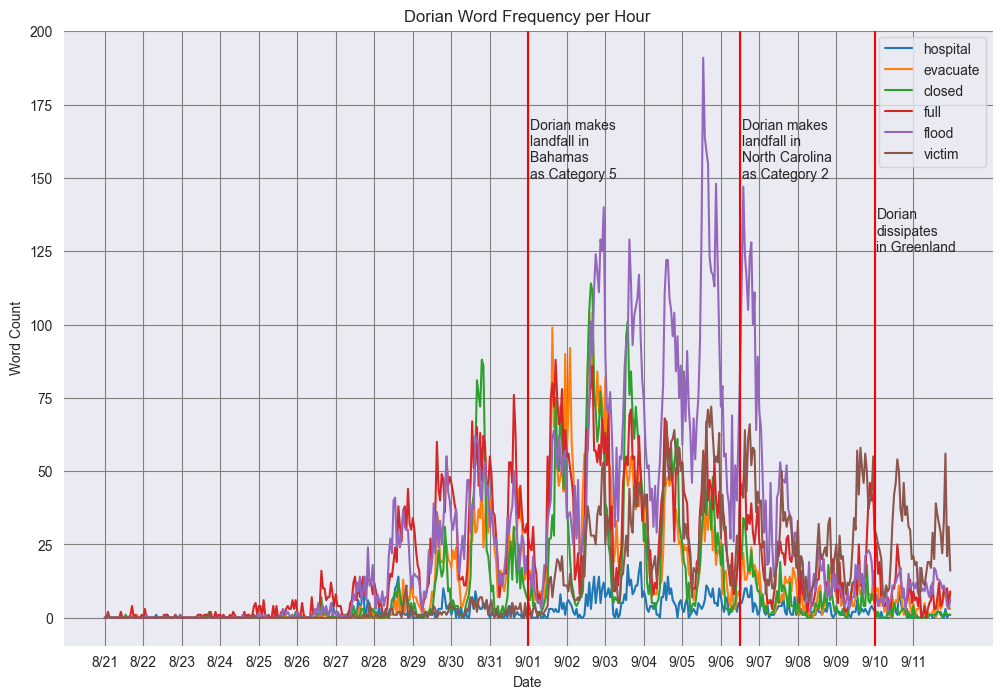

In [13]:
dates = pd.date_range(start='08/21/2019', end='09/11/2019')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(12,8))
plt.xticks(np.arange(0, len(keywords['hospital']), 24), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.title('Dorian Word Frequency per Hour')

for word in keywords:
    plt.plot(keywords[word])

plt.axvline(x=24*11, color='red')
plt.text(24*11+1, 150, 'Dorian makes\nlandfall in\nBahamas\nas Category 5')
plt.axvline(x=24*16.5, color='red')
plt.text(24*16.5+1, 150, 'Dorian makes\nlandfall in\nNorth Carolina\nas Category 2')
plt.axvline(x=24*20, color='red')
plt.text(24*20+1, 125, 'Dorian\ndissipates\nin Greenland')

plt.legend(keywords.keys())
plt.grid(color='gray')
plt.savefig('text data/Dorian/word_frequency_dorian.png')
plt.show()

In [4]:
print(hospital_status.shape)
hospital_status.head()

(1045, 70)


Unnamed: 0.1  Unnamed: 0            user       user_id  \
0        1393.0        1393    wilde_dorian  2.515904e+09   
1        2461.0        2461  darling_dorian  1.652245e+09   
2       20045.0       20045     DeptSaludPR  1.510492e+09   
3        4770.0        4770      TyponewsPR  3.821590e+07   
4        8144.0        8144     Dorian_de_L  7.752140e+17   

                                         description  \
0  Trans man. Pan. Fat. Msian. Uppity pendatang. ...   
1  Dorian 🇵🇷🏳️‍🌈 24. He/Him. I love Visual Kei, a...   
2  Bienvenidos a la cuenta oficial de Twitter del...   
3  Te informamos sobre tecnología, autos, polític...   
4                                                NaN   

                       created_at  verified               location  \
0  Thu May 22 17:19:11 +0000 2014     False               Malaysia   
1  Wed Aug 07 07:02:24 +0000 2013     False                    NaN   
2  Wed Jun 12 13:02:09 +0000 2013     False  San Juan, Puerto Rico   
3  Wed May 06 16:25:58 +0000 2009     False            Puerto Rico   
4  Mon Sep 12 06:06:32 +0000 2016     False                    NaN   

   followers_count  friends_count  ...  qt_in_reply_to_status_id  \
0              994            535  ...                       NaN   
1              200           1623  ...                       NaN   
2            19322            882  ...                       NaN   
3            48630           1220  ...                       NaN   
4                8             49  ...                       NaN   

   qt_in_reply_to_user_id  qt_in_reply_to_screen_name qt_retweeted  \
0                     NaN                         NaN          0.0   
1                     NaN                         NaN          NaN   
2                     NaN                         NaN          NaN   
3                     NaN                         NaN          NaN   
4                     NaN                         NaN          NaN   

  qt_favorited qt_retweet_count  qt_favorite_count  qt_language longitude  \
0          0.0             69.0              137.0           en       NaN   
1          NaN              NaN                NaN          NaN       NaN   
2          NaN              NaN                NaN          NaN       NaN   
3          NaN              NaN                NaN          NaN       NaN   
4          NaN              NaN                NaN          NaN       NaN   

   lattitude  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 70 columns]

In [ ]:
hospital_counts = []
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

hospital_status['time'] = pd.to_datetime(hospital_status['time'])

while start_date <= end_date:
    sub = hospital_status[hospital_status['time'].dt.date.astype('str') == start_date.strftime('%Y-%m-%d')]
    hospital_counts.append(len(sub))
    start_date += delta

print(hospital_counts)

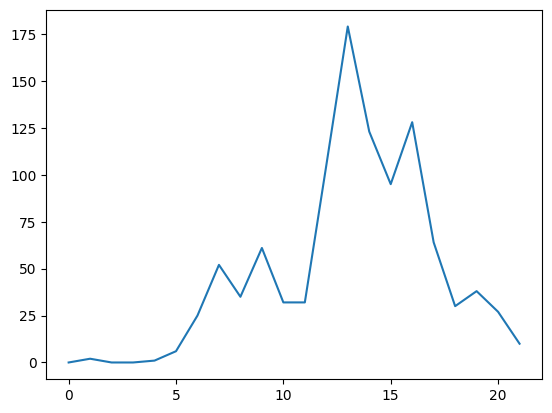

In [3]:
hospital_counts = [0, 2, 0, 0, 1, 6, 25, 52, 35, 61, 32, 32, 105, 179, 123, 95, 128, 64, 30, 38, 27, 10]
plt.plot(hospital_counts)
plt.show()

In [5]:
analyzer = SentimentIntensityAnalyzer()

sentiment_score = []
for tweet in hospital_status['full_text']:
    vs = analyzer.polarity_scores(tweet)
    sentiment_score.append(vs['compound'])

hospital_status['sentiment'] = sentiment_score

In [ ]:
start_date = datetime.date(2019, 8, 27)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)
avg_sentiment_hospital = []

hospital_status['time'] = pd.to_datetime(hospital_status['time'])

while start_date <= end_date:
    sub = hospital_status[hospital_status['time'].dt.date.astype('str') == start_date.strftime('%Y-%m-%d')]
    avg_sentiment_hospital.append(statistics.mean(sub['sentiment']))
    start_date += delta

print(avg_sentiment_hospital)

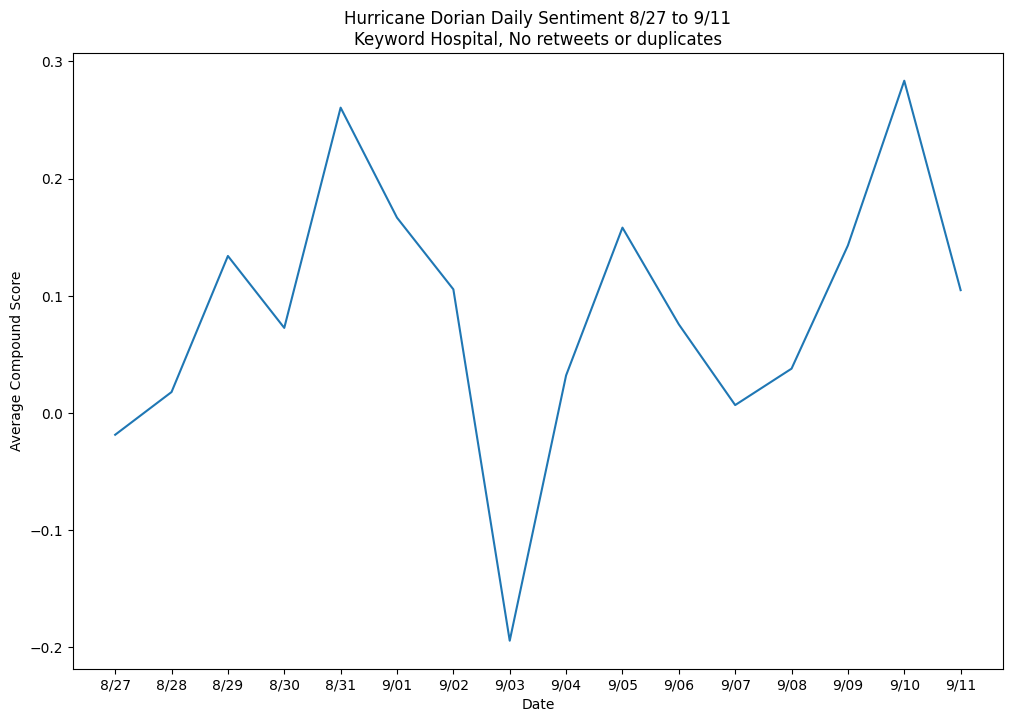

In [10]:
avg_sentiment_hospital = [-0.018576, 0.01786923076923077, 0.13393428571428573, 0.07257704918032787, 0.26045625, 0.16661875, 0.10547619047619047, -0.1942631284916201, 0.03202926829268293, 0.15811684210526317, 0.07562187499999999, 0.006748437499999997, 0.03780666666666666, 0.14288947368421054, 0.2834148148148148, 0.10476]
dates = pd.date_range(start='08/27/2019', end='09/11/2019')
formatted_dates = dates.strftime('%m/%d')
formatted_dates = [x[1:] for x in formatted_dates]
plt.figure(figsize=(12,8))
plt.xticks(range(len(dates)), formatted_dates)
plt.xlabel('Date')
plt.ylabel('Average Compound Score')
# plt.ylim([-.25, .25])
# plt.bar(range(len(avg_sentiment)), avg_sentiment)
plt.plot(avg_sentiment_hospital)
plt.title('Hurricane Dorian Daily Sentiment ' + formatted_dates[0] + ' to ' + formatted_dates[-1] +
          '\nKeyword Hospital, No retweets or duplicates')
# plt.axhline(y=.05, color='green')
# plt.axhline(y=-.05, color='green')
# plt.axvline(x=16, color='red')
# plt.text(16.1,-.15,'Dorian makes\nlandfall in US')
# plt.axvline(x=20, color='red')
# plt.text(20.1,.15,'Dorian\ndissipates\nin\nGreenland')
# plt.savefig('sentiment analysis/Dorian/sentiment_daily_dorian.png')
plt.show()

In [8]:
hospital_status['time'] = pd.to_datetime(hospital_status['time'])
sub = hospital_status[hospital_status['time'].dt.date.astype('str') == '2019-09-03'].reset_index(drop=True)
for i in range(len(sub)):
    print('Time:', sub['time'][i], 'User:', sub['user'][i])
    print(sub['full_text'][i])
    print('Sentiment Score:', sub['sentiment'][i], '\n')

Time: 2019-09-03 23:57:01+00:00 User: telestraster
when dorian passes i'm gonna call the vet hospital and get an estimate on an examination for him, cause there's stuff we just aren't qualified to handle. my mom told me to ask them about an apprenticeship djxkfkgntnt
Sentiment Score: 0.0 

Time: 2019-09-03 23:16:33+00:00 User: DJFleming1945
Breaking News: A ?crisis of epic proportions?: Rescue efforts in the Bahamas are stalled as Dorian?s floodwaters deluge emergency vehicles, hospitals and shelters. https://t.co/ZWVrLabSvr
Sentiment Score: -0.6946 

Time: 2019-09-03 23:06:38+00:00 User: LauPerezCisnero
Lo que sucedi en Las Bahamas tras El Paso del huracn #Dorian es inenarrable, prcticamente el aeropuerto y el principal hospital han desaparecido y cifras preliminares de la ONU sealan que 60 mil personas necesitan alimentos y agua ?? potable https://t.co/BbldLd5K7R
Sentiment Score: 0.0 

Time: 2019-09-03 23:03:52+00:00 User: wcti12
Officials at Vidant Medical Center say they will not b

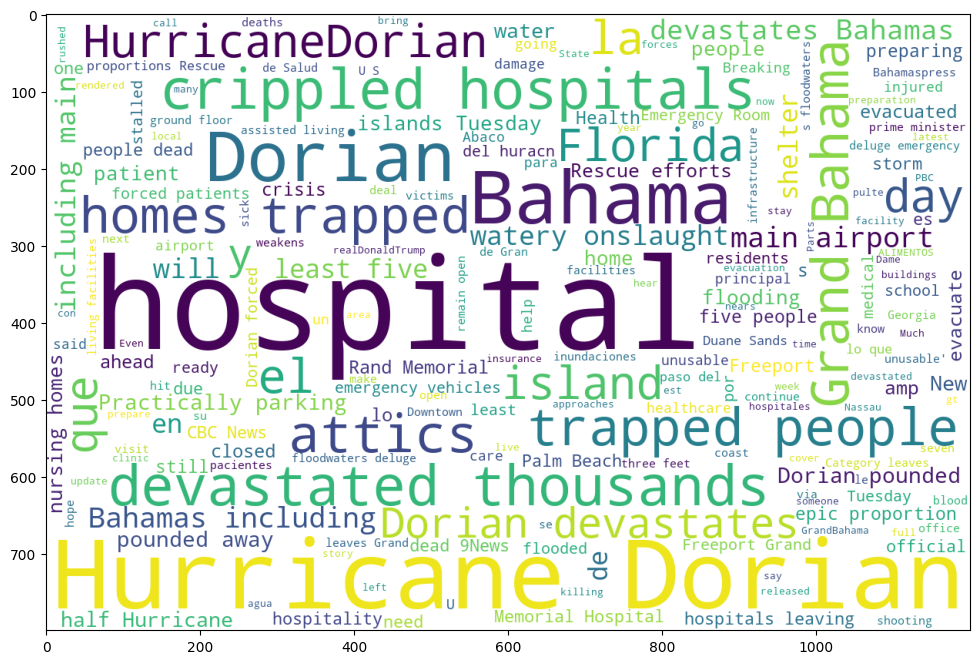

In [18]:
sub = hospital_status[hospital_status['time'].dt.date.astype('str') == '2019-09-03']
text = ' '.join(sub['full_text'])
stopwords = set(STOPWORDS)
stopwords.update(["https", "t", "co", "RT"])
wordcloud = WordCloud(width=1200, height=800, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.show()

In [25]:
list(wordcloud.words_.items())[0:10]

[('hospital', 1.0),
 ('Hurricane Dorian', 0.6319444444444444),
 ('Bahama', 0.3402777777777778),
 ('Dorian', 0.3055555555555556),
 ('devastated thousands', 0.18055555555555555),
 ('crippled hospitals', 0.18055555555555555),
 ('attics', 0.1597222222222222),
 ('trapped people', 0.1527777777777778),
 ('Grand Bahama', 0.1527777777777778),
 ('homes trapped', 0.14583333333333334)]

In [21]:
for i in range(len(hospital_status['full_text'])):
    print('Time:', str(hospital_status['time'][i]), 'User:', hospital_status['user'][i])
    print(hospital_status['full_text'][i], '\n')

Time: 2019-08-22 15:50:34+00:00 User: wilde_dorian
I would be able to breathe a little easier. Pay off my debts a little quicker. Be able to afford hysterectomy in an MOE hospital so I can get it done sooner instead of waiting until August next year in an MOH hospital (my actual surgery date).

And much much more. https://t.co/vrS2a1DGUD 

Time: 2019-08-22 08:11:59+00:00 User: darling_dorian
@TomHChamp He’s a pretty popular Captain America cosplayer based out of Colorado ^^ he runs a charity organization that donates money to kids in the hospital and organizes trips to visit them in cosplay as their favorite heroes. He’s a super wholesome dude ^^ 

Time: 2019-08-25 11:40:46+00:00 User: DeptSaludPR
¡ATENCION IMPORTANTE!
HURACANES 2019 NO DEJES PARA LO ULTIMO. ATIENDE LAS COSAS CON TIEMPO.
@hospitalespr
@ColegioMedicoPR @PRpreparado

https://t.co/BzHEow9ldr 

Time: 2019-08-26 22:33:12+00:00 User: TyponewsPR
70 hospitales tienen generadores de energía y sistemas @wandavazquezg #Dorian 

T

In [6]:
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

keywords = ['closed', 'closing']
closures = pd.DataFrame()

while start_date <= end_date:
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)
    df['full_text'] = [remove_urls(x) for x in df['full_text']]
    df = df.drop_duplicates(subset='full_text').reset_index(drop=True)

    for i in range(len(df['full_text'])):
        for keyword in keywords:
            if keyword in df['full_text'][i]:
                closures = pd.concat([closures, df.iloc[[i]]])
                print('Time:', str(df['time'][i]), 'User:', df['user'][i])
                print(df['full_text'][i], '\n')
                break

    start_date += delta

Time: Wed Aug 21 20:01:48 +0000 2019 User: Dorian_971
RT @closedapp: “ur smile says a lot about you”

me:  

Time: Wed Aug 21 14:00:33 +0000 2019 User: dorian_mw
RT @thejam984: Now that all bars will be closed countrywide for two days starting Saturday 5pm we hope that you have all stocked your fridges and liquor cabinets. lol 
#JoeyAndMartin  

Time: Wed Aug 21 13:22:36 +0000 2019 User: lowhaiku
@AnnaEngelbrech5 @TrueFactsStated @WalshFreedom exactly, I see slop bucket's waistline as the portrait of dorian gray. every child he's abused/raped/shown abnormal cruelty to - is worn like a sin. never stop body shaming trump.

bloat, the size of a
small planet orbits his waist
mudflap jaws swing closed

#TheHoleInTrumpsNose 

Time: Thu Aug 22 01:17:11 +0000 2019 User: wilde_dorian
@Ahmad_Faizal_D @Michellelanious Malaysia's sexual predator registry is also closed off to the public, if I'm not mistaken. Like, what's the point? 

Time: Fri Aug 23 21:18:56 +0000 2019 User: tobago_james
RT @Trac

In [12]:
closures2 = closures[~closures['full_text'].str.contains('closing in')].reset_index(drop=True)
closures2 = closures2[~closures2['full_text'].str.contains('case closed')].reset_index(drop=True)
closures2 = closures2[~closures2['full_text'].str.contains('closed door')].reset_index(drop=True)
closures2 = closures2[~closures2['full_text'].str.contains('border')].reset_index(drop=True)
print(len(closures2))

10490


In [16]:
keywords = ['hospital', 'health', 'clinic']
count = 0
for i in range(len(closures2)):
    for keyword in keywords:
        if keyword in closures2['full_text'][i]:
            count += 1
            print('Time:', str(closures2['time'][i]), 'User:', closures2['user'][i])
            print(closures2['full_text'][i], '\n')
            break
print(count)

Time: Thu Aug 29 22:25:42 +0000 2019 User: SamuelHHoward
.@LoggerheadMC plans on closing its hospital and the Juno Beach Pier to visitors on Friday at noon. @LeslieStreeter wrote about that and more here:  

Time: Thu Aug 29 19:09:59 +0000 2019 User: democracee
Unbelievably,I settled in Pan Handle because it was the most affordable area w/services I needed. It was devastated 10/10/18. 1 of 3 major hospitals closed, housing became scarce &amp; EXPENSIVE. I moved to MIAMI, DORIAN approaches! Ya can’t make this up. 

Time: Thu Aug 29 18:46:13 +0000 2019 User: WESH
RT @clairemetzwesh: from #flaglercounty health dept staff: – they w b closed for services starting Friday, August 30 for Hurricane Dorian response &amp; Special Needs Shelter operation at Rymfire Elementary School.  Please refer to  for updates as to when services will resume. 

Time: Thu Aug 29 18:45:48 +0000 2019 User: clairemetzwesh
from #flaglercounty health dept staff: – they w b closed for services starting Friday, August 

# Individual Accounts Analysis

In [ ]:
start_date = datetime.date(2019, 8, 21)
end_date = datetime.date(2019, 9, 11)
delta = datetime.timedelta(days=1)

official = ['CVSHealth', 'DeaconBlues0']

while start_date <= end_date:
    print(start_date)
    df = pd.read_csv(r"C:\Users\xiaod\Downloads\Hurricane Dorian CSV\\" + str(start_date) + ".csv", encoding_errors='ignore', low_memory=False)

    for i in range(len(df['full_text'])):
        if df['user'][i] in official:
            print('Time:', str(df['time'][i]), 'User:', df['user'][i])
            print(df['full_text'][i], '\n')

    start_date += delta